In [132]:
import os
import sys
import time
import numpy as np
import skimage.io as io
import json
import tqdm

ROOT_DIR = os.path.join(os.path.abspath(os.getcwd()), '../../')
sys.path.append(ROOT_DIR)

import utils

import dataset as dataset_tool
import categories as categories
from settings import *

In [133]:
relation_data = []
relation_path = os.path.join(meta_path, 'relation')
for i in tqdm.tqdm(range(categories.cate_cnt)):
    relation_file_path = os.path.join(relation_path, '%d.json' % i)
    with open(relation_file_path, 'r') as fin:
        relation_data.append(json.load(fin))

100%|██████████| 41/41 [01:42<00:00,  2.49s/it]


In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

chair table
139.90 -300.84 -1051.31


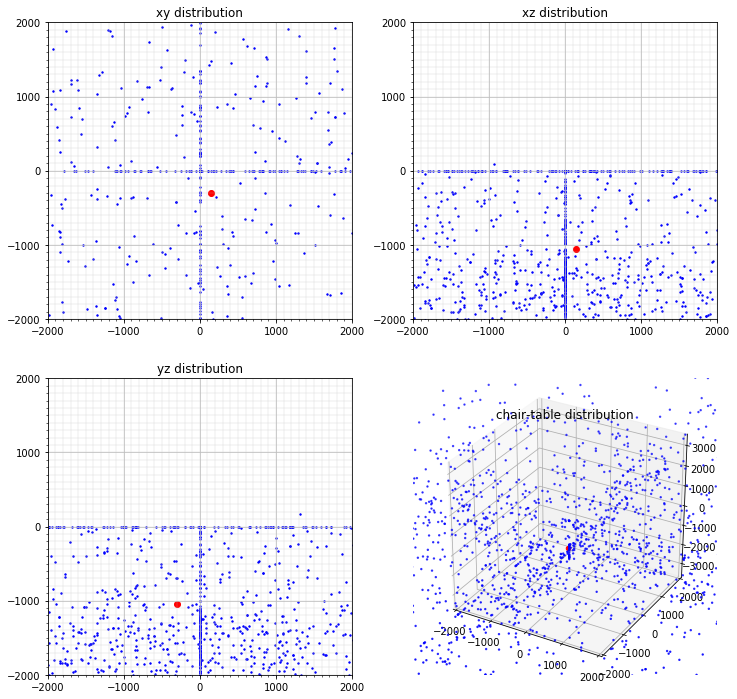

In [167]:
fig = plt.figure(figsize=(12, 12)) 
# ax = fig.add_subplot(111, projection='3d') 
axs = [fig.add_subplot(221+i) for i in range(3)] 
axs.append(fig.add_subplot(224, projection='3d'))

for ax in axs:
    ax.set_xlim(-2000, 2000)
    ax.set_ylim(-2000, 2000)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))#设置x主坐标间隔 1
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))#设置x从坐标间隔 0.1
    ax.yaxis.set_major_locator(plt.MultipleLocator(1000))#设置y主坐标间隔 1
    ax.yaxis.set_minor_locator(plt.MultipleLocator(100))#设置y从坐标间隔 0.1
    ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
    ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')#由每个x主坐标出发对x主坐标画垂直于x轴的线段
    ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
    ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

    
axs[0].set_title('xy distribution')
axs[1].set_title('xz distribution')
axs[2].set_title('yz distribution')
axs[3].set_title('3d distribution')

import random
sub = random.randint(0, categories.cate_cnt)
sub = 5
obj = 7
for i in relation_data[sub]:
    d = np.array(relation_data[0][i])
    if len(d.shape) > 1 and i == str(obj):
        print(categories.category2name(sub), categories.category2name(i))
        ind = np.random.choice(d.shape[0], 2000)
        x = d[:, 0][ind]
        y = d[:, 1][ind]
        z = d[:, 2][ind]
        xm = x.mean()
        ym = y.mean()
        zm = z.mean()
        func = axs[0].scatter
        func(x, y, color='b', s=2) 
        func(xm, ym, color='r')
        func = axs[1].scatter
        func(x, z, color='b', s=2) 
        func(xm, zm, color='r')
        func = axs[2].scatter
        func(y, z, color='b', s=2) 
        func(ym, zm, color='r')
        func = axs[3].scatter3D
        func(x, y, z, color='b', s=2) 
        func(xm, ym, zm, color='r')
        print("%.2f %.2f %.2f" % (xm, ym, zm))
        plt.title('%s-%s distribution' % (categories.category2name(sub), categories.category2name(i)))
        
        plt.show()
        break
